In [1]:
from mabpsol import Bandit 
from mabpsol import *
import matplotlib.pyplot as plt

pay_offs = [0.25, 0.3, 0.5, 0.1, 0.3, 0.25, 0]
bandit = Bandit(pay_offs)

methods = {'random_agent':random_agent, 'explore_greedy_agent':explore_greedy_agent, 'epsilon_greedy_agent':epsilon_greedy_agent, 'decaying_epsilon_greedy_agent':decaying_epsilon_greedy_agent, 'optimistic_greedy_agent':optimistic_greedy_agent, 'ucb_agent':ucb_agent, 'thompson_agent':thompson_agent, 'optimal_agent':optimal_agent}
results = dict()

number_of_iterations = 2000
number_of_trials = 50

for m in methods.keys():
    method = methods[m]
    all_rewards = []
    total_rewards = []
    cumulative_reward = []

    for trial in range(number_of_trials):
        total_reward = 0

        actions, rewards = method(bandit, number_of_iterations)
        all_rewards.append(rewards)
        total_reward += sum(rewards)
        cumulative_reward.append(total_reward)

    results[m] = all_rewards
    print('Agent:                 ', m)
    print('Avg cumulative reward: ', np.mean(cumulative_reward))

Agent:                  random_agent
Avg cumulative reward:  485.5
Agent:                  explore_greedy_agent
Avg cumulative reward:  733.5
Agent:                  epsilon_greedy_agent
Avg cumulative reward:  869.42
Agent:                  decaying_epsilon_greedy_agent
Avg cumulative reward:  892.4
Agent:                  optimistic_greedy_agent
Avg cumulative reward:  961.8
Agent:                  ucb_agent
Avg cumulative reward:  975.24
Agent:                  thompson_agent
Avg cumulative reward:  950.36
Agent:                  optimal_agent
Avg cumulative reward:  998.7


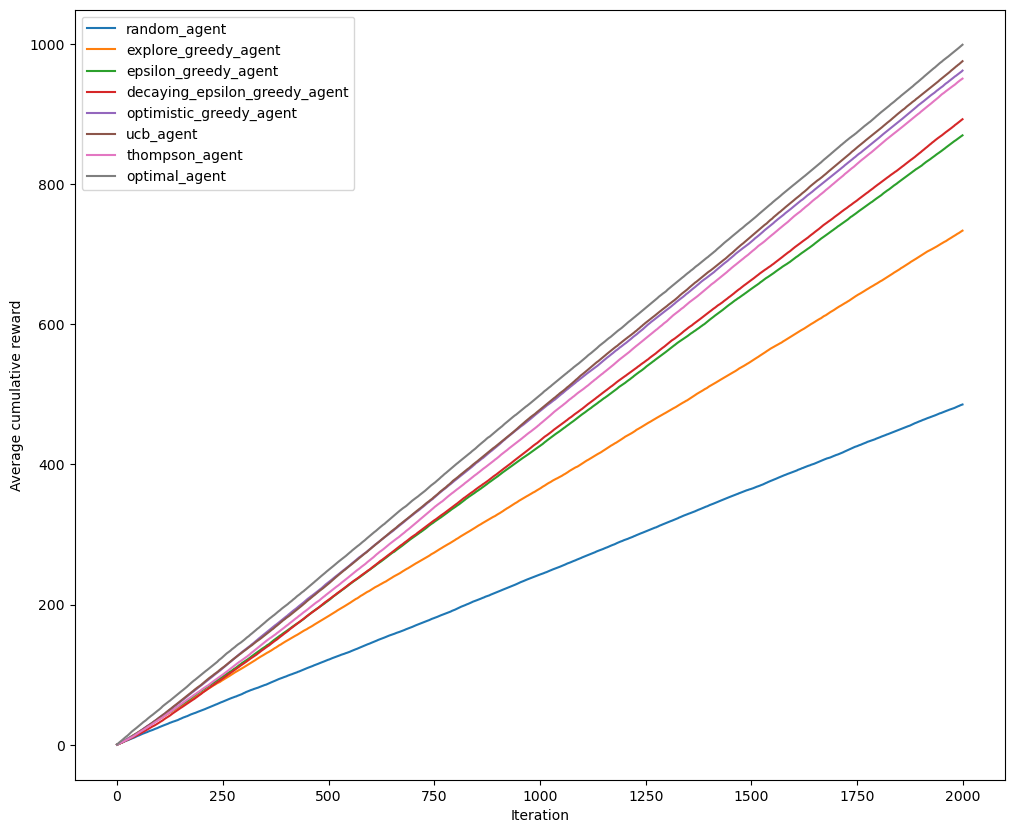

In [2]:
# create a plot of the results
plt.figure(figsize=(12,10))

for agent in methods.keys():
    mean_reward_per_iteration = np.mean(results[agent],axis=0)
    mean_cum_reward_per_it = np.cumsum(mean_reward_per_iteration)
    plt.plot(mean_cum_reward_per_it, label=agent)

plt.ylabel('Average cumulative reward')
plt.xlabel('Iteration')
plt.legend()
plt.show()